# Input

In [81]:
def read_input():
    with open("./data/dag14.txt") as f:
        inp = f.read().split("\n")
        temp = [x.split("->") for x in inp]
        for i in range(len(temp)):
            for j in range(len(temp[i])):
                tempi = temp[i][j].split(",")
                temp[i][j] = [int(tempi[0]), int(tempi[1])]

    return temp


# Part 1

In [82]:
import numpy as np
import matplotlib.pyplot as plt 
from tqdm import tqdm

def print_arr(playground):
    if playground is not None:
        temp = np.zeros((len(playground), len(playground[0])))
        for i in range(len(playground)):
            for j in range(len(playground[i])):
                if playground[i][j] == "#":
                    temp[i][j] = 1
                if playground[i][j] == "+":
                    temp[i][j] = 0.5
    
        plt.imshow(temp, cmap='gray', aspect='auto', interpolation='none')

In [83]:
inp = read_input()

minix = float("inf")
maxix = float("-inf")
miniy = float("inf")
maxiy = float("-inf")

for i in inp:
    for j in i:
        if j[0] < minix:
            minix = j[0]
        if j[0] > maxix:
            maxix = j[0]
        if j[1] > maxiy:
            maxiy = j[1]

minix, maxix, maxiy

playground = [["." for i in range(maxix - minix + 1)] for j in range(maxiy+1)]

for i in range(len(inp)):
    for j in range(len(inp[i])):
        inp[i][j][0] = inp[i][j][0] - minix

(452, 510, 59)

In [84]:
walls = []
for i1, v1 in enumerate(inp):
    walls.append([])
    for i2, v2 in enumerate(v1):
        if i2 != 0 and walls[i1][-1] != v2:
            while walls[i1][-1] != v2:
                xs, ys = walls[i1][-1][0], walls[i1][-1][1]
                xe, ye = v1[i2][0], v1[i2][1]
                if xs - xe < 0:
                    walls[i1].append([xs+1, ys])
                if xs - xe > 0:
                    walls[i1].append([xs-1, ys])
                if ys - ye < 0:
                    walls[i1].append([xs, ys+1])
                if ys - ye > 0:
                    walls[i1].append([xs, ys-1])

        walls[i1].append(v2)

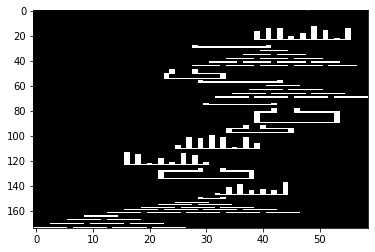

In [85]:
for i in walls:
    for j in i:
        playground[j[1]][j[0]] = "#"

sand_x = 500 - minix
sand_y = 0
playground[sand_y][sand_x] = "+"

print_arr(playground)

862


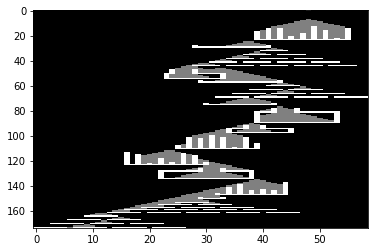

In [86]:
def sand_falling(cave, new_sand_coord, old_sand_coord):
    sand_y, sand_x = new_sand_coord[0], new_sand_coord[1]
    
    if sand_y+1 >= len(cave) or sand_x+1 >= len(cave[0]):
        if sand_y+1 >= len(cave):
            cave[sand_y][sand_x] = "+"
        return cave

    if old_sand_coord != [0, len(playground[0]) - (maxix - 500) - 1]:
        cave[old_sand_coord[0]][old_sand_coord[1]], cave[new_sand_coord[0]][new_sand_coord[1]] = cave[new_sand_coord[0]][new_sand_coord[1]], cave[old_sand_coord[0]][old_sand_coord[1]]
    elif old_sand_coord == [0, len(playground[0]) - (maxix - 500) - 1]:
        cave[new_sand_coord[0]][new_sand_coord[1]] = "+"
        
    if cave[sand_y+1][sand_x] == ".":
        old_sand_pos = [sand_y, sand_x]
        next_sand_pos = [sand_y+1, sand_x]
        return sand_falling(cave, next_sand_pos, old_sand_pos)

    # sand falls to the left
    elif (cave[sand_y+1][sand_x] == "+" or cave[sand_y+1][sand_x] == "#") and cave[sand_y+1][sand_x-1] == ".":
        old_sand_pos = [sand_y, sand_x]
        next_sand_pos = [sand_y+1, sand_x-1]
        return sand_falling(cave, next_sand_pos, old_sand_pos)
    
    # sand falls to the right
    elif (cave[sand_y+1][sand_x] == "+" or cave[sand_y+1][sand_x] == "#") and (cave[sand_y+1][sand_x-1] == "+" or cave[sand_y+1][sand_x-1] == "#") and cave[sand_y+1][sand_x+1] == ".":
        old_sand_pos = [sand_y, sand_x]
        next_sand_pos = [sand_y+1, sand_x+1]
        return sand_falling(cave, next_sand_pos, old_sand_pos)
    
    return cave


counter = 0
temp = sand_falling(playground, [sand_y, sand_x], [sand_y, sand_x])
while "+" not in playground[len(playground)-1]:
    temp = sand_falling(playground, [sand_y, sand_x], [sand_y, sand_x])

    counter += 1

print_arr(temp)
print(counter)


# Part 2

In [87]:
inp = read_input()

minix = float("inf")
maxix = float("-inf")
miniy = float("inf")
maxiy = float("-inf")

for i in inp:
    for j in i:
        if j[0] < minix:
            minix = j[0]
        if j[0] > maxix:
            maxix = j[0]
        if j[1] > maxiy:
            maxiy = j[1]

minix, maxix, maxiy

dist = maxix - minix

minix -= 10*dist
maxix += 10*dist

inp.append([[minix, maxiy + 2], [maxix, maxiy + 2]])
maxiy = maxiy + 2

playground = [["." for i in range(maxix - minix + 1)] for j in range(maxiy+1)]

for i in range(len(inp)):
    for j in range(len(inp[i])):
        inp[i][j][0] = inp[i][j][0] - minix

(-128,
 1090,
 1219,
 176,
 [[[618, 63], [623, 63]],
  [[617, 159], [622, 159]],
  [[609, 56], [609, 57], [623, 57], [623, 56]],
  [[613, 157], [618, 157]],
  [[606, 157], [611, 157]],
  [[626, 69], [631, 69]],
  [[619, 23],
   [619, 17],
   [619, 23],
   [621, 23],
   [621, 14],
   [621, 23],
   [623, 23],
   [623, 14],
   [623, 23],
   [625, 23],
   [625, 21],
   [625, 23],
   [627, 23],
   [627, 18],
   [627, 23],
   [629, 23],
   [629, 13],
   [629, 23],
   [631, 23],
   [631, 16],
   [631, 23],
   [633, 23],
   [633, 22],
   [633, 23],
   [635, 23],
   [635, 14],
   [635, 23]],
  [[609, 126],
   [609, 128],
   [602, 128],
   [602, 134],
   [618, 134],
   [618, 128],
   [613, 128],
   [613, 126]],
  [[619, 23],
   [619, 17],
   [619, 23],
   [621, 23],
   [621, 14],
   [621, 23],
   [623, 23],
   [623, 14],
   [623, 23],
   [625, 23],
   [625, 21],
   [625, 23],
   [627, 23],
   [627, 18],
   [627, 23],
   [629, 23],
   [629, 13],
   [629, 23],
   [631, 23],
   [631, 16],
   [631, 

In [88]:
walls = []
for i1, v1 in enumerate(inp):
    walls.append([])
    for i2, v2 in enumerate(v1):
        if i2 != 0 and walls[i1][-1] != v2:
            while walls[i1][-1] != v2:
                xs, ys = walls[i1][-1][0], walls[i1][-1][1]
                xe, ye = v1[i2][0], v1[i2][1]
                if xs - xe < 0:
                    walls[i1].append([xs+1, ys])
                if xs - xe > 0:
                    walls[i1].append([xs-1, ys])
                if ys - ye < 0:
                    walls[i1].append([xs, ys+1])
                if ys - ye > 0:
                    walls[i1].append([xs, ys-1])

        walls[i1].append(v2)

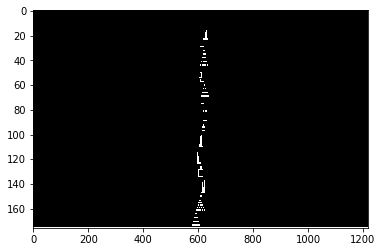

In [89]:
for i in walls:
    for j in i:
        playground[j[1]][j[0]] = "#"

sand_x = 500 - minix
sand_y = 0
playground[sand_y][sand_x] = "+"

print_arr(playground)

28744


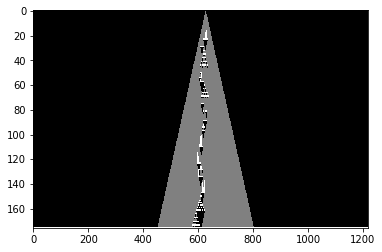

In [90]:
from copy import deepcopy

def sand_falling(cave, new_sand_coord, old_sand_coord):
    sand_y, sand_x = new_sand_coord[0], new_sand_coord[1]

    if sand_y+1 >= len(cave) or sand_x+1 >= len(cave[0]):
        if sand_y+1 >= len(cave):
            cave[sand_y][sand_x] = "+"
        return cave

    if old_sand_coord != [0, len(playground[0]) - (maxix - 500) - 1]:
        cave[old_sand_coord[0]][old_sand_coord[1]], cave[new_sand_coord[0]][new_sand_coord[1]] = cave[new_sand_coord[0]][new_sand_coord[1]], cave[old_sand_coord[0]][old_sand_coord[1]]
    elif old_sand_coord == [0, len(playground[0]) - (maxix - 500) - 1]:
        cave[new_sand_coord[0]][new_sand_coord[1]] = "+"
        
    if cave[sand_y+1][sand_x] == ".":
        old_sand_pos = [sand_y, sand_x]
        next_sand_pos = [sand_y+1, sand_x]
        return sand_falling(cave, next_sand_pos, old_sand_pos)

    # sand falls to the left
    elif (cave[sand_y+1][sand_x] == "+" or cave[sand_y+1][sand_x] == "#") and cave[sand_y+1][sand_x-1] == ".":
        old_sand_pos = [sand_y, sand_x]
        next_sand_pos = [sand_y+1, sand_x-1]
        return sand_falling(cave, next_sand_pos, old_sand_pos)
    
    # sand falls to the right
    elif (cave[sand_y+1][sand_x] == "+" or cave[sand_y+1][sand_x] == "#") and (cave[sand_y+1][sand_x-1] == "+" or cave[sand_y+1][sand_x-1] == "#") and cave[sand_y+1][sand_x+1] == ".":
        old_sand_pos = [sand_y, sand_x]
        next_sand_pos = [sand_y+1, sand_x+1]
        return sand_falling(cave, next_sand_pos, old_sand_pos)
    else:
        return cave


counter = 1
old = None
while True:

    temp = sand_falling(playground, [sand_y, sand_x], [sand_y, sand_x])
    if old == temp:
        break

    old = deepcopy(temp)

    counter += 1

print_arr(temp)
print(counter)
